In [1]:
import numpy as np

from quadrotor_diffusion.utils.trajectory import (
    derive_trajectory,
    integrate_trajectory,
    smooth_columns,
    compute_tracking_error
)

from quadrotor_diffusion.utils.dataset.dataset import QuadrotorTrajectoryDataset
from quadrotor_diffusion.utils.dataset.normalizer import NoNormalizer

In [2]:
data = QuadrotorTrajectoryDataset("../data/quadrotor_random", NoNormalizer())
I = 25

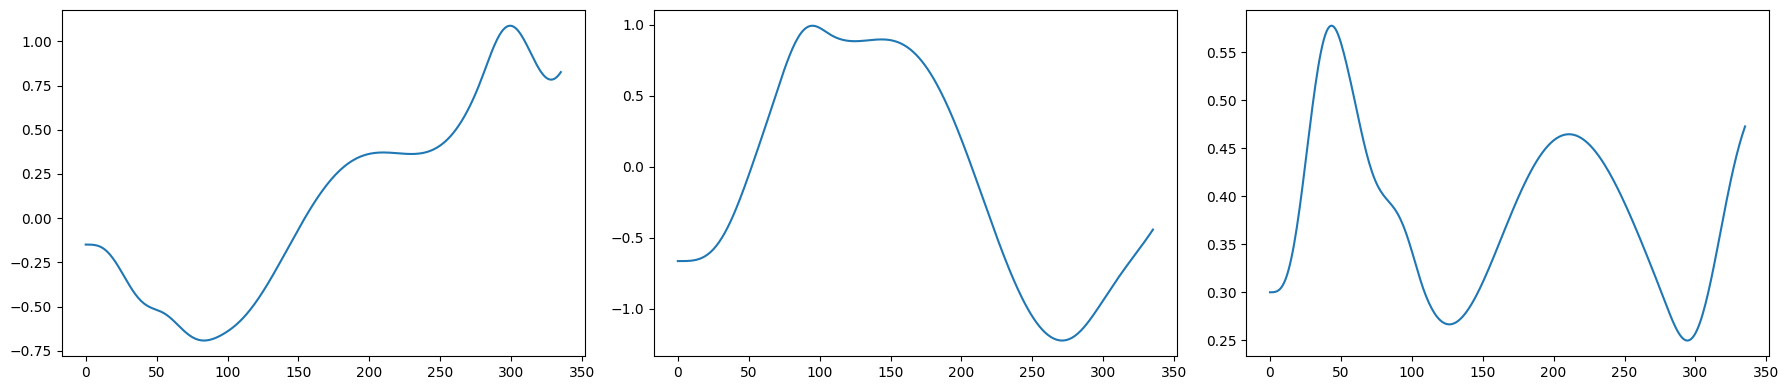

In [3]:
ref_pos = data[I].numpy()

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))
plt.subplot(131)
plt.plot(ref_pos[:, 0])
plt.subplot(132)
plt.plot(ref_pos[:, 1])
plt.subplot(133)
plt.plot(ref_pos[:, 2])
plt.tight_layout()
plt.show()

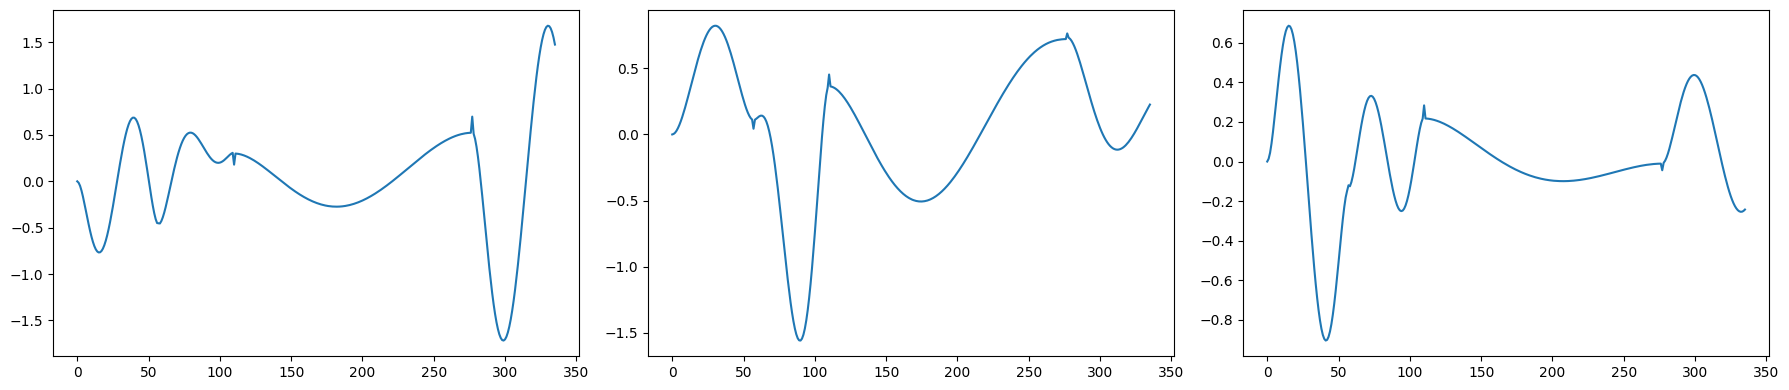

In [32]:
deriv_acc = derive_trajectory(ref_pos, ctrl_freq=30, order=3)

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))
plt.subplot(131)
plt.plot(deriv_acc[:, 0])
plt.subplot(132)
plt.plot(deriv_acc[:, 1])
plt.subplot(133)
plt.plot(deriv_acc[:, 2])
plt.tight_layout()
plt.show()

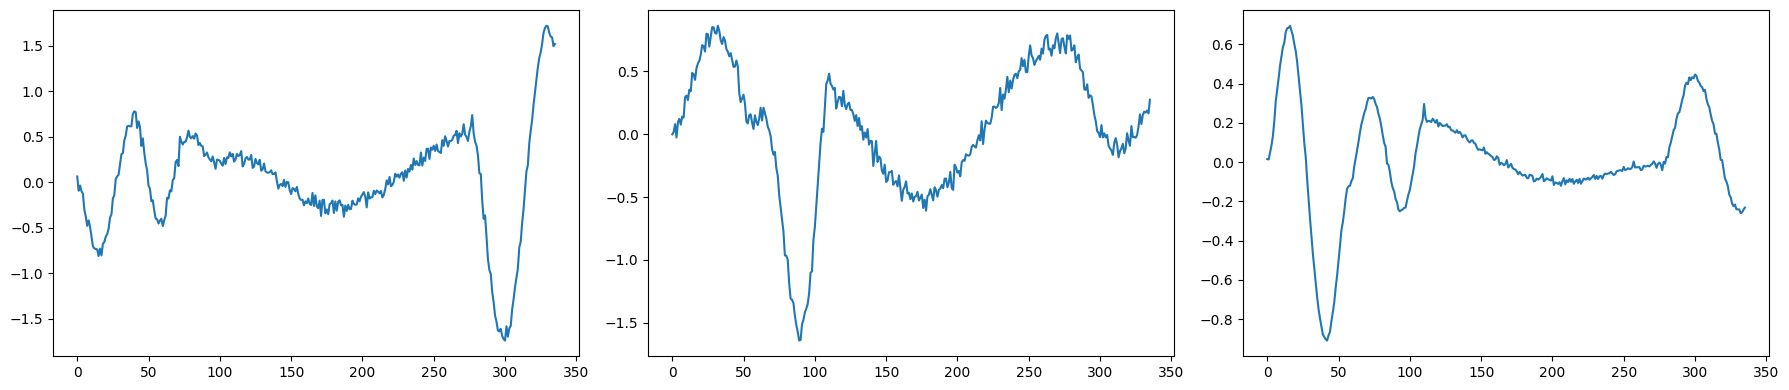

In [40]:
noise = np.random.normal(0, 0.05, deriv_acc.shape)
noise[:, 2] = np.random.normal(0, 0.01, deriv_acc.shape[0])
n_deriv_acc = deriv_acc + noise

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))
plt.subplot(131)
plt.plot(n_deriv_acc[:, 0])
plt.subplot(132)
plt.plot(n_deriv_acc[:, 1])
plt.subplot(133)
plt.plot(n_deriv_acc[:, 2])
plt.tight_layout()
plt.show()

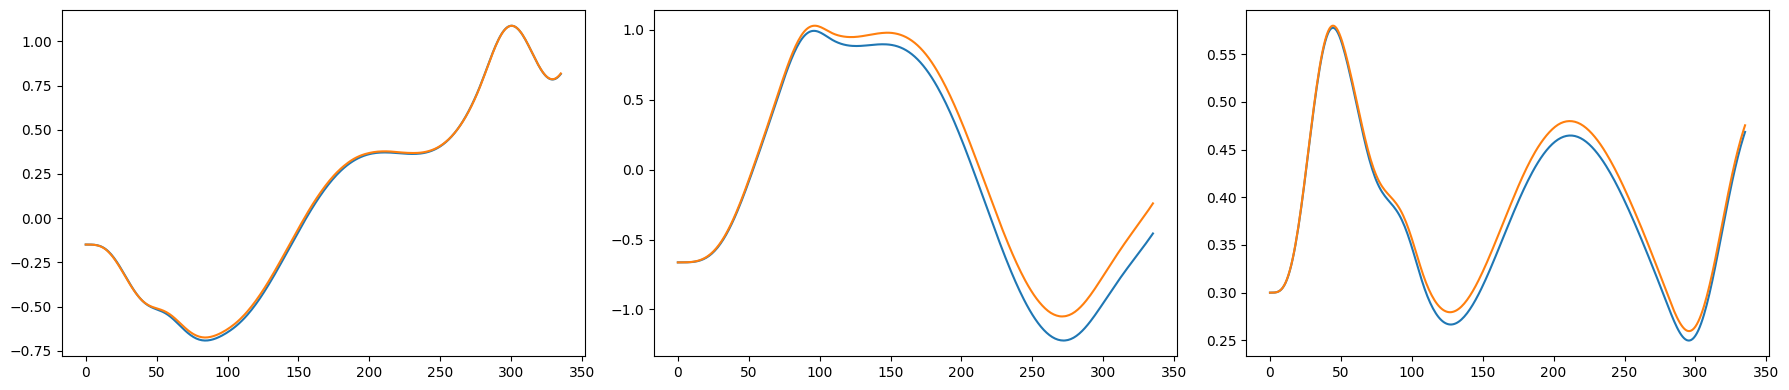

[0.00798534 0.01390282 0.00364302]
[0.00920718 0.10169388 0.01066287]


In [41]:
vel_recon = integrate_trajectory(deriv_acc, ctrl_freq=30)
pos_recon = integrate_trajectory(vel_recon, ctrl_freq=30, initial_conditions=ref_pos[0])

vel_recon_noise = integrate_trajectory(n_deriv_acc, ctrl_freq=30)
pos_recon_noise = integrate_trajectory(vel_recon_noise, ctrl_freq=30, initial_conditions=ref_pos[0])

plt.figure(figsize=(18, 4))
plt.subplot(131)
plt.plot(pos_recon[:, 0], label='Ref 1')
plt.plot(pos_recon_noise[:, 0], label='Ref 2')
plt.subplot(132)
plt.plot(pos_recon[:, 1], label='Ref 1')
plt.plot(pos_recon_noise[:, 1], label='Ref 2')
plt.subplot(133)
plt.plot(pos_recon[:, 2], label='Ref 1')
plt.plot(pos_recon_noise[:, 2], label='Ref 2')
plt.tight_layout()
plt.show()

print(compute_tracking_error(ref_pos, pos_recon))
print(compute_tracking_error(ref_pos, pos_recon_noise))

In [ ]:
from quadrotor_diffusion.utils.simulator import play_trajectory

worked, obs_pos = play_trajectory(pos_recon)
print(worked)
worked, obs_pos2 = play_trajectory(ref_pos)

/u/cbf2xv/quadrotor-sim/simulator/safe_control_gym/utils/configuration.py:76: UserWarning: No agent/task config given.
  warnings.warn("No agent/task config given.")
/u/cbf2xv/.conda/envs/qdiff/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


@1=vertcat(x, x_dot, y, y_dot, z, z_dot, phi, theta, psi, p, q, r), @2=vertcat(f1, f2, f3, f4), (mac(mac((0.5*(@1-Xr)'),Q,zeros(1x12)),(@1-Xr),0)+mac(mac((0.5*(@2-Ur)'),R,zeros(1x4)),(@2-Ur),0))
True
@1=vertcat(x, x_dot, y, y_dot, z, z_dot, phi, theta, psi, p, q, r), @2=vertcat(f1, f2, f3, f4), (mac(mac((0.5*(@1-Xr)'),Q,zeros(1x12)),(@1-Xr),0)+mac(mac((0.5*(@2-Ur)'),R,zeros(1x4)),(@2-Ur),0))


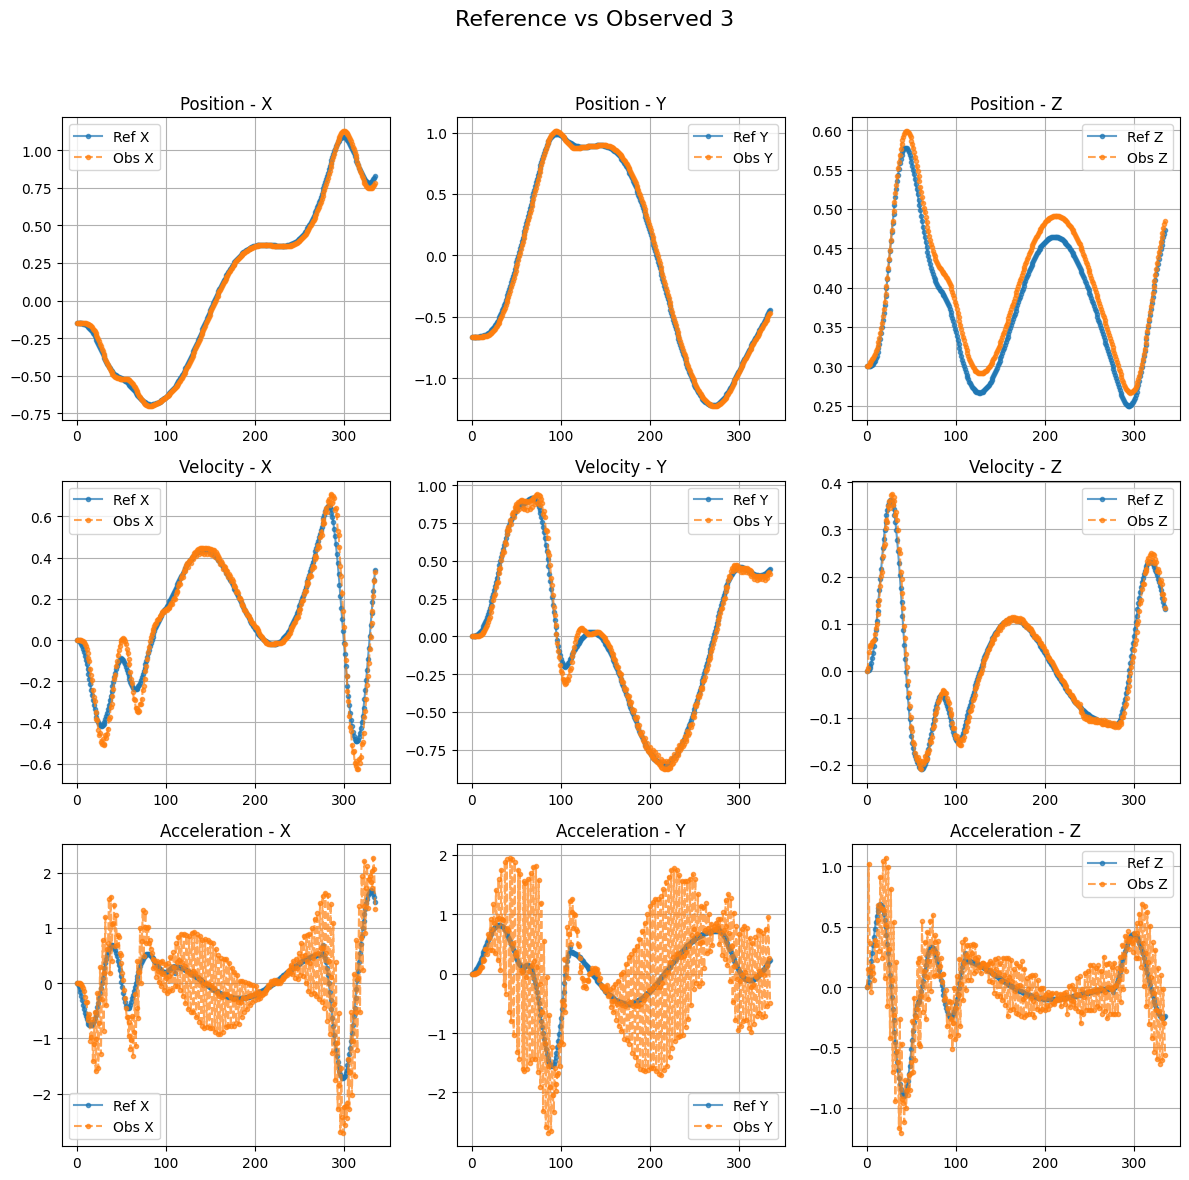

In [10]:
from quadrotor_diffusion.utils.plotting import plot_ref_obs_states

plot_ref_obs_states(
    ref_pos,
    derive_trajectory(ref_pos, 30),
    derive_trajectory(ref_pos, 30, 3),
    obs_pos,
    derive_trajectory(obs_pos, 30),
    derive_trajectory(obs_pos, 30, 3),
    f"Reference vs Observed {3}",
    f"reference_vs_observed_{3}.pdf",
)


In [ ]:
# Difference between reconstructed position from snap to position following in sim
print(compute_tracking_error(obs_pos, obs_pos2))

[0.01532033 0.02697591 0.05298113]


In [2]:
from quadrotor_diffusion.utils.dataset.dataset import QuadrotorAcc, evaluate_dataset
from quadrotor_diffusion.utils.dataset.normalizer import NoNormalizer

data = QuadrotorAcc("../data/quadrotor_random", NoNormalizer())
mean, variance, min_values, max_values = evaluate_dataset(data)

print("Mean:")
print(mean)

print("\nVariance:")
print(variance)

print("\nMin Values:")
print(min_values)

print("\nMax Values:")
print(max_values)

Mean:
[-0.0314335  -0.21546747 -0.26440017]

Variance:
[142.05006557 143.19205374  26.37770079]

Min Values:
[-1.98130977 -1.97393417 -1.94273508]

Max Values:
[1.98571217 1.99426019 1.91298211]


In [1]:
import numpy as np
from quadrotor_diffusion.utils.dataset.dataset import QuadrotorAcc, evaluate_dataset
from quadrotor_diffusion.utils.dataset.normalizer import MinMaxNormalizer

data2 = QuadrotorAcc("../data/quadrotor_random", MinMaxNormalizer(mins=np.array([-2.0, -2.0, -2.0]), maxes=np.array([2.0, 2.0, 2.0])))
mean, variance, min_values, max_values = evaluate_dataset(data2)

print("Mean:")
print(mean)

print("\nVariance:")
print(variance)

print("\nMin Values:")
print(min_values)

print("\nMax Values:")
print(max_values)


Mean:
[0.4999715  0.49981967 0.49981847]

Variance:
[0.02622007 0.02644034 0.00488409]

Min Values:
[0.00467255 0.00651646 0.01431623]

Max Values:
[0.9964281  0.9985651  0.97824556]


In [4]:
data2[0]

tensor([[0.5000, 0.5000, 0.5000],
        [0.4945, 0.5014, 0.4990],
        [0.4827, 0.5044, 0.4968],
        ...,
        [0.2930, 0.3468, 0.4055],
        [0.2970, 0.3647, 0.4081],
        [0.3033, 0.3830, 0.4117]])